# Assignment 1 Jinqi Cheng

## File Paths

In [29]:
weather_path = "./US_WeatherEvents_2016-2019.csv"
trump_tweets_path = "./trumptweets.csv"

test_weatherfile = "weathertest.csv"

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Weather data

In [8]:
weather_data = pd.read_csv(weather_path)
weather_df = pd.read_csv(weatherfile)

__Question 1__

How many snow events were recorded?

In [9]:
num_snow_events = len(weather_data[weather_data.Type=="Snow"])
print("There are ", num_snow_events, " snow events were recorded")

There are  679472  snow events were recorded


__Question 2__

How many moderate snow events were recorded each year? Produce a table and line plot

Second column indicates the number of moderate snow
Year
2016    16899
2017    15778
2018    18674
2019    22290
Name: EventId, dtype: int64


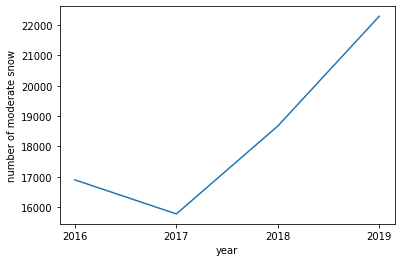

In [10]:
end_time = weather_data["EndTime(UTC)"].values.tolist()

#get years from timestamps
year = [i[0:4] for i in end_time]

#create a new column containing years
year_series = pd.Series(year)
weather_data['Year'] = year_series

#count the number of moderate snow by year
mod_snow_table = weather_data[(weather_data.Type=="Snow")&(weather_data.Severity=="Moderate")].groupby("Year").count()["EventId"]
x = mod_snow_table.index.values.tolist()
y = mod_snow_table.values.tolist()

print("Second column indicates the number of moderate snow")
print(mod_snow_table)
plt.plot(x,y)
plt.xlabel("year")
plt.ylabel("number of moderate snow")
plt.show()

__Question 3__

How many snow events were recorded in each state?

In [36]:
#count number of snow events by state
state_snow_table = weather_data[(weather_data.Type=="Snow")].groupby("State").count()["EventId"]
print(state_snow_table)

State
AL      701
AR     1461
AZ     4973
CA     8727
CO    38218
CT     3200
DE      663
FL       69
GA     1021
IA    26408
ID    19491
IL    17429
IN    12838
KS     5758
KY     5449
LA      401
MA     9595
MD     2842
ME    13821
MI    76455
MN    74201
MO     5662
MS      535
MT    23906
NC     4820
ND    33522
NE    16751
NH     9856
NJ     3695
NM     7561
NV     5852
NY    28592
OH    20848
OK     3078
OR     8988
PA    19555
RI     1530
SC      837
SD    16491
TN     1302
TX     3351
UT     8386
VA     9012
VT    10124
WA    12737
WI    46691
WV     8423
WY    43646
Name: EventId, dtype: int64


__Question 4__

How many snow events were recorded each hour? (Reults will be produced in about 5-10 minutes)

In [37]:
#A list that holds the time span for each snow event
num_snow_lst = []

#A method that calculates the hour span for each snow event
def count(x):
    start_time,end_time = x
    time_span = pd.to_datetime(end_time)-pd.to_datetime(start_time)
    hour_span = [time_span.days]*24
    start_hour,end_hour = pd.to_datetime(start_time).hour,pd.to_datetime(end_time).hour
    index = start_hour
    while True:
        hour_span[index] += 1
        if index==end_hour:
            break
        index = (index+1)%24
    for i in range(len(hour_span)):
        num_snow_lst.append(hour_span)

#sum up the hour span for all snow events
weather_data["hour_span"] = weather_data[(weather_data.Type=="Snow")].apply(lambda x:[x["StartTime(UTC)"],x["EndTime(UTC)"]],axis=1)
weather_data[(weather_data.Type=="Snow")].hour_span.apply(count)
num_snow_lst = np.array(num_snow_lst)
num_snow_lst = np.sum(num_snow_lst,0)
hour_list = [i for i in range(24)]
df = pd.DataFrame(num_snow_lst)
print(df.to_string())

          0
0   1662000
1   1675920
2   1697112
3   1714176
4   1738152
5   1751568
6   1774560
7   1789320
8   1816176
9   1842936
10  1876416
11  1916856
12  1939800
13  1969992
14  2015784
15  2010984
16  1949616
17  1857888
18  1775136
19  1728696
20  1702704
21  1677528
22  1666416
23  1657344


__Question 5__

How many events of each severity did San Diego have? Produce a table and bar plot.

Severity
Heavy         62
Light       2870
Moderate    1992
Other          3
Severe      1365
UNK           15
Name: EventId, dtype: int64


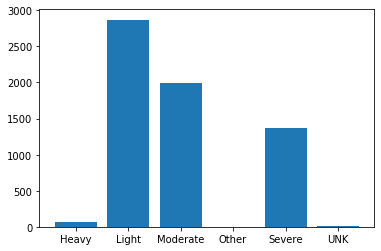

In [38]:
# count number of events by severity in San Diego
table = weather_data[(weather_data.City=="San Diego")].groupby("Severity").count()["EventId"]
print(table)
x = table.index.values.tolist()
y = table.values.tolist()
plt.bar(range(len(y)),y,tick_label=x)
plt.show()

## Trump Tweets

In [19]:
trump_tweets_data = pd.read_csv(trump_tweets_path)

__Question 1__

How many tweets did the President make each year? Produce a table of results and plot
the values.

Year
2009      56
2010     143
2011     870
2012    4190
2013    8207
2014    5987
2015    7719
2016    3951
2017    2232
2018    2998
2019    4588
2020     181
Name: id, dtype: int64


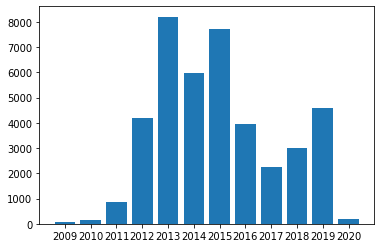

In [39]:
tweet_date = trump_tweets_data["date"].values.tolist()

#get the year from tweet_date
year = [i[0:4] for i in tweet_date]
year_series = pd.Series(year)

#create a new column "year"
trump_tweets_data['Year'] = year_series

#get the number of tweets by year
table = trump_tweets_data.groupby("Year").count()['id']

print(table)
x = table.index.values.tolist()
y = table.values.tolist()
plt.bar(range(len(y)),y,tick_label=x)
plt.show()

__Question 2__

How many tweets contain "Fake News"?

In [40]:
tweets_contains_fake_news = trump_tweets_data[trump_tweets_data.content.str.contains("Fake News")].content.count()
print("case sensitive \"Fake News\": ", tweets_contains_fake_news)

tweets_contains_fake_news2 = trump_tweets_data[trump_tweets_data.content.str.contains("Fake News",case=False)].content.count()
print("not case sensitive \"Fake News\": ", tweets_contains_fake_news2)

case sensitive "Fake News":  477
not case sensitive "Fake News":  560


__Question 3__

A tweet with the location could be considered a security issue as it would give the current
location of the President. How many tweets contain a location?

In [41]:
t = trump_tweets_data[trump_tweets_data.geo.notnull()]
print(t)
print("No tweet contains a location. Geo column is empty")

Empty DataFrame
Columns: [id, link, content, date, retweets, favorites, mentions, hashtags, geo, Year]
Index: []
No tweet contains a location. Geo column is empty


__Question 4__

How many tweets were done each hour? Produce a table and a plot.

Hour
00    1620
01    1522
02    1795
03    1974
04    2076
05    1258
06     831
07     400
08     347
09     321
10     458
11     706
12    1377
13    2226
14    2448
15    2544
16    2319
17    2146
18    2025
19    2095
20    2696
21    3184
22    3050
23    1704
Name: id, dtype: int64


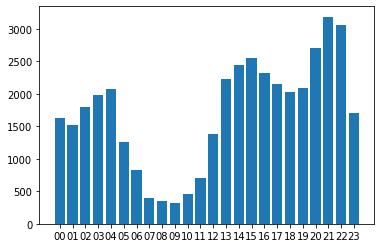

In [42]:
tweets_per_hour = trump_tweets_data["date"].values.tolist()

#get the hour from timestamp
hour = [i[-8:-6] for i in tweets_per_hour]

#create a new column "hour"
hour_series = pd.Series(hour)
trump_tweets_data['Hour'] = hour_series

#count number of tweets in each hour
table = trump_tweets_data.groupby("Hour").count()["id"]
print(table)
x = table.index.values.tolist()
y = table.values.tolist()
plt.bar(range(len(y)),y,tick_label=x)
plt.show()